# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [16]:
def F(n):
    # Start coding
    alpabet = ("A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","X","Y","Z")
    letters = ""

    for i in range(n):  
        string = "-"*(n-i-1)+letters[::-1]+"A"+letters+"-"*(n-i-1)
        letters = letters + alpabet[i+1]
        print(string)
        
    pass

# Tests
F(10)
F(6)


---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [17]:
def F(d : dict):
    # Start coding
    print("Sorted by key values ascending:")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by x values descending:")
    for key in sorted(d.keys(), key=lambda k: d[k][0], reverse=True): #could have done it in a longer way without lambda but becomes way smaller with it
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by y values ascending:")
    for key in sorted(d.keys(), key=lambda k: d[k][1]):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key values ascending:
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values descending:
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values ascending:
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by key values ascending:
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values descending:
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values ascending:
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [18]:
#TODO
File = "student_records.csv"
with open(File, "r") as file:
    count = 0
    for row in file:
        print(row)
        count += 1
        if(count>10): break

roll_number,department,credit,course_name,course_type,grade

588946,MA,3,EC250,hasmed_elective,AB

145372,EP,4,EP407,hasmed_elective,CC

834515,MA,8,EP885,hasmed_elective,BB

344265,CSE,6,CSE699,honours,AB

358405,MA,3,EE460,minor,AP

781075,CE,8,CE540,honours,CC

180828,CSE,6,CE880,minor,AB

981238,MM,4,CSE226,minor,AB

836881,MM,8,MM530,core,AA

310604,EE,8,EE202,core,AB



#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [59]:
#TODO
# Guys idk if like hasmed_elective and stuff is part of cpi, im just assuming its core courses and all electives. If not the code here should indicate that i can handle even if its the painful case
#and due to this ig the cpi's are a bit low for everyone
import csv #it is not an external library
students = dict() 
with open('student_records.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    i = 0
    for row in reader:
        if i == 0:
            i = 1
            continue
        else:
            if not(row[0] in students):
                students.update({row[0]: [[row[1], row[2], row[3], row[4], row[5]],]})
            else:
                students[row[0]].append([row[2], row[3], row[4], row[5]])    


def convert_to_credit(grade):
    credit = 0
    if grade == 'AP' or grade == 'AA': credit == 10
    elif grade == 'AB': credit = 9
    elif grade == 'BB': credit = 8 
    elif grade == 'BC': credit = 7 
    elif grade == 'CC': credit = 6 
    return credit


for key in students.keys():
    cpi = 0
    total_credits = 0
    max_credits = 0
    course_credit = 0
    for list in students[key]:
            course = list[3]
            Course = list[2] # when accessing not the first list
            if course == 'core' or course == 'department_elective' or course == 'hasmed_elective' or course == 'flexible_elective':
                course_credit = convert_to_credit(list[4])
                max_credits += int(list[1])
                total_credits += course_credit*int(list[1])
            elif Course == 'core' or Course == 'department_elective' or Course == 'hasmed_elective' or Course == 'flexible_elective': 
                course_credit = convert_to_credit(list[3])
                max_credits += int(list[0])
                total_credits += course_credit*int(list[0])
    cpi = total_credits/max_credits
    print(f'For {key}, the CPI : %.3f and Total credits : %d'%( cpi,max_credits))



For 588946, the CPI : 4.444 and Total credits : 90
For 145372, the CPI : 6.244 and Total credits : 90
For 834515, the CPI : 5.914 and Total credits : 93
For 344265, the CPI : 3.033 and Total credits : 60
For 358405, the CPI : 5.845 and Total credits : 71
For 781075, the CPI : 4.008 and Total credits : 122
For 180828, the CPI : 5.189 and Total credits : 74
For 981238, the CPI : 5.336 and Total credits : 110
For 836881, the CPI : 5.381 and Total credits : 105
For 310604, the CPI : 5.361 and Total credits : 83
For 847809, the CPI : 4.915 and Total credits : 82
For 773982, the CPI : 6.262 and Total credits : 122
For 500658, the CPI : 6.518 and Total credits : 114
For 810863, the CPI : 4.963 and Total credits : 80
For 124663, the CPI : 4.679 and Total credits : 81
For 364146, the CPI : 4.250 and Total credits : 64
For 871746, the CPI : 6.747 and Total credits : 91
For 270007, the CPI : 5.814 and Total credits : 86
For 597353, the CPI : 6.407 and Total credits : 59
For 986057, the CPI : 5.92

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [78]:
#TODO

import csv #it is not an external library
students = dict() 
with open('student_records.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    i = 0
    for row in reader:
        if i == 0:
            i = 1
            continue
        else:
            if not(row[0] in students):
                students.update({row[0]: [[row[1], row[2], row[3], row[4], row[5]],]})
            else:
                students[row[0]].append([row[2], row[3], row[4], row[5]])    

for key in students.keys():
    
    core = 0
    dep_elec = 0
    flex_elec = 0
    has_elec = 0
    for list in students[key]:
        course = list[3]
        Course = list[2] # when accessing not the first list
        if (course == 'core'): core += int(list[1])
        elif (course == 'department_elective'): dep_elec += int(list[1])
        elif (course == 'felxible_elective'): flex_elec += int(list[1])
        elif (course == 'hasmed_elective'): has_elec += int(list[1])
        if (Course == 'core'): core += int(list[0])
        elif (Course == 'department_elective'): dep_elec += int(list[0])
        elif (Course == 'felxible_elective'): flex_elec += int(list[0])
        elif (Course == 'hasmed_elective'): has_elec += int(list[0])
    if(core >= 20 and dep_elec>=15 and flex_elec>=10 and has_elec>=5):
        print(f'{key} has graduated!')
        i = i+1
    """ else:
        print(f'{key} has not graduated')
        print(f'{core} , {dep_elec}, {flex_elec}, {has_elec}')"""


588946 has graduated!
834515 has graduated!
781075 has graduated!
180828 has graduated!
981238 has graduated!
836881 has graduated!
310604 has graduated!
773982 has graduated!
500658 has graduated!
810863 has graduated!
124663 has graduated!
871746 has graduated!
986057 has graduated!
379479 has graduated!
144528 has graduated!
485484 has graduated!
845623 has graduated!
150503 has graduated!
214270 has graduated!
517837 has graduated!
482623 has graduated!
721490 has graduated!
955757 has graduated!
143856 has graduated!
571782 has graduated!
973158 has graduated!
703403 has graduated!
960395 has graduated!
521087 has graduated!
461971 has graduated!
879634 has graduated!
716985 has graduated!
265922 has graduated!
283796 has graduated!
203200 has graduated!
327122 has graduated!
534763 has graduated!
391848 has graduated!
971123 has graduated!
207443 has graduated!
488661 has graduated!
782129 has graduated!
928288 has graduated!
581858 has graduated!
282482 has graduated!
572815 has

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [77]:
#TODO
import csv #it is not an external library
students = dict() 
depts = ['EC', 'EP', 'CSE', 'EE', 'CE', 'MM', 'ME', 'IE', 'MA', 'CH']
with open('student_records.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    i = 0
    for row in reader:
        if i == 0:
            i = 1
            continue
        else:
            if(row[4] == 'minor'):
                if not(row[0] in students):
                    students.update({row[0]: [[row[2], row[3], row[5]],]})
                else:
                    students[row[0]].append([row[2], row[3], row[5]])    



for key in students.keys():
    minor = dict()
    for list in students[key]:
        course = list[1]
        for dept in depts:
            if dept in course:
                credit = int(list[0])
                if dept in minor:
                    minor[dept] += credit
                else:
                    minor.update({dept:credit})
    for Key, value in minor.items():
        if(value>=10):
            print(f"{key} has attained minor in {Key}")

358405 has attained minor in CH
847809 has attained minor in ME
847809 has attained minor in EP
847809 has attained minor in CH
847809 has attained minor in EE
781075 has attained minor in EC
124663 has attained minor in CE
364146 has attained minor in MM
364146 has attained minor in EC
721490 has attained minor in ME
571782 has attained minor in MA
716985 has attained minor in CSE
716985 has attained minor in CE
482623 has attained minor in CSE
482623 has attained minor in CH
329535 has attained minor in EP
810863 has attained minor in EP
810863 has attained minor in CSE
973158 has attained minor in ME
973158 has attained minor in CH
143142 has attained minor in MA
907454 has attained minor in IE
907454 has attained minor in EP
907454 has attained minor in MA
888886 has attained minor in IE
888886 has attained minor in MM
608952 has attained minor in ME
143856 has attained minor in ME
773982 has attained minor in CE
960395 has attained minor in MA
960395 has attained minor in IE
28379

#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [61]:
#TODO
import csv #it is not an external library
students = dict() 
with open('student_records.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    i = 0
    for row in reader:
        if i == 0:
            i = 1
            continue
        else:
            if not(row[0] in students):
                students.update({row[0]: [[row[1], row[2], row[3], row[4], row[5]],]})
            else:
                students[row[0]].append([row[2], row[3], row[4], row[5]])    


for key in students.keys():
    core = 0
    honours = 0
    for list in students[key]:
        course = list[3]
        Course = list[2] # when accessing not the first list
        if (course == 'core'): core += int(list[1])
        elif (course == 'honours'): honours += int(list[1])
        if(Course == 'core'): core+= int(list[0])
        elif(Course == 'honours'): honours += int(list[0])
    if(core >= 20 and honours>=10):
        print(f'{key} has attained honours in!')


588946 has attained honours!
145372 has attained honours!
834515 has attained honours!
781075 has attained honours!
836881 has attained honours!
310604 has attained honours!
773982 has attained honours!
500658 has attained honours!
810863 has attained honours!
124663 has attained honours!
364146 has attained honours!
871746 has attained honours!
986057 has attained honours!
718510 has attained honours!
379479 has attained honours!
582912 has attained honours!
788020 has attained honours!
613401 has attained honours!
144528 has attained honours!
485484 has attained honours!
199713 has attained honours!
845623 has attained honours!
150503 has attained honours!
214270 has attained honours!
517837 has attained honours!
482623 has attained honours!
721490 has attained honours!
955757 has attained honours!
589528 has attained honours!
143856 has attained honours!
571782 has attained honours!
973158 has attained honours!
703403 has attained honours!
960395 has attained honours!
521087 has att

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [5]:
#TODO
from scipy.optimize import minimize
def func(x):
    X = x[0]
    Y = x[1]
    return 2*(X-Y-3)**2 + 4*(X+2*Y+1)**4

def cons1(x):
    X = x[0]
    Y = x[1]
    return X - Y + 3

def cons2(x):
    X = x[0]
    Y = x[1]
    return 5-((X+2)**2 + (Y+1)**2)

Cons1 = {'type':'ineq', 'fun': cons1}
Cons2= {'type':'ineq', 'fun': cons2}

cons = [Cons1, Cons2]
x0 = [0,0]

result = minimize(func, x0, constraints=cons)
print(result)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216977713
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [13]:
#TODO
import numpy as np
from scipy.integrate import quad

def integrand(x,y):
    return x**2 + y**4

def Integrand(t):
    return (integrand((3**(1/2))*np.cos(t), (3**(1/2))*np.sin(t))*(3**(1/2)))

result, not_result = quad(Integrand, 0, 2 * np.pi)
print(result)

53.05363140385086


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [3]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [5]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2


def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [6]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    centers = np.zeros((K,2))
    if init_centers == None:
        array = data.copy()
        np.random.shuffle(array)
        centers = array[:K]
    else:
        centers = np.array(init_centers)
    return centers


In [7]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    size = data.shape
    labels = np.full((size[0], 1), size[0])
    return labels

In [8]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2)) 
    return distances

In [15]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    new_labels = np.argmin(distances, axis=0)
    return new_labels

In [9]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):

    _, n = np.shape(data)
    centers = np.empty((K, n))
    for i in range(K):
        points = data[labels == i] #get points for the cluster i
        centers[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centers


In [10]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [11]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [12]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0013799667358398438


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

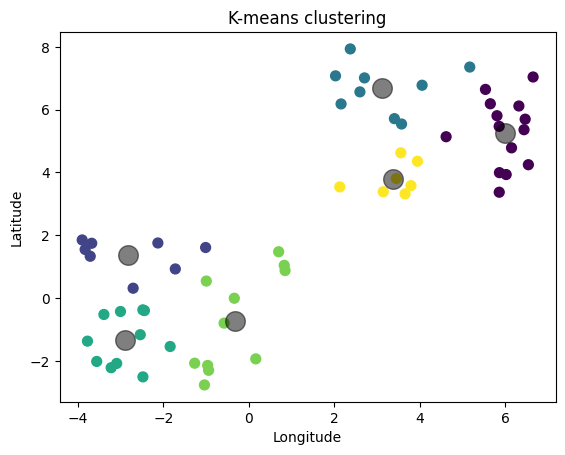

In [50]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)